In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
data=pd.read_excel("House Dataset.xlsx")
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [5]:
# Checking for the number of rows and columns
data.shape

(414, 9)

In [6]:
#Checking for missing values
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
# Checking for duplicates
data.duplicated().sum()

0

In [12]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


#### From my observation above, there are no missing values or duplicates.

In [14]:
data.sample(2)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
7,2013.416667,20.3,287.6025,6,24.98042,121.54228,3,1316,46.7
303,2013.500000,38.3,439.7105,0,24.97161,121.53423,2,1144,38.4


In [15]:
data["Price"]=data["House size (sqft)"]*data["House price of unit area"]
data["Price"]

0      21792.5
1      52328.0
2      50138.0
3      47950.0
4      21162.1
        ...   
409    12366.2
410    63900.0
411    20421.8
412    31342.5
413    70098.3
Name: Price, Length: 414, dtype: float64

In [16]:
# Price has been added to the column
data.sample(2)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
35,2013.500000,13.9,4079.4180,0,25.01459,121.51816,2,1249,27.3,34097.7
115,2013.083333,20.6,737.9161,2,24.98092,121.54739,1,441,46.4,20462.4


In [30]:
plt.scatter(ins.Transaction date,ins.Price)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2951450739.py, line 1)

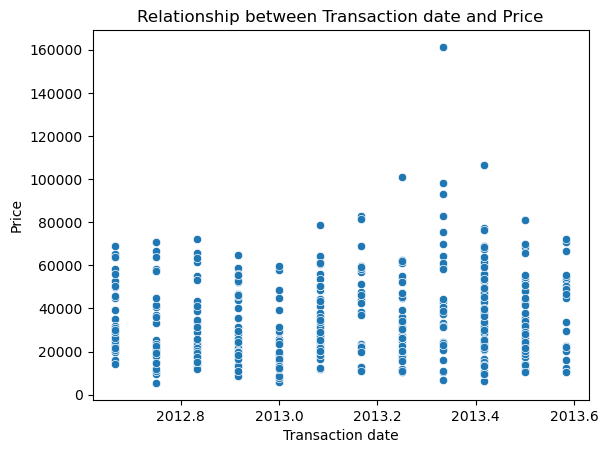

In [35]:
sns.scatterplot(data=data, x="Transaction date", y="Price")
plt.title("Relationship between Transaction date and Price")
plt.show()

#### There is no relationship between Transaction date and Price

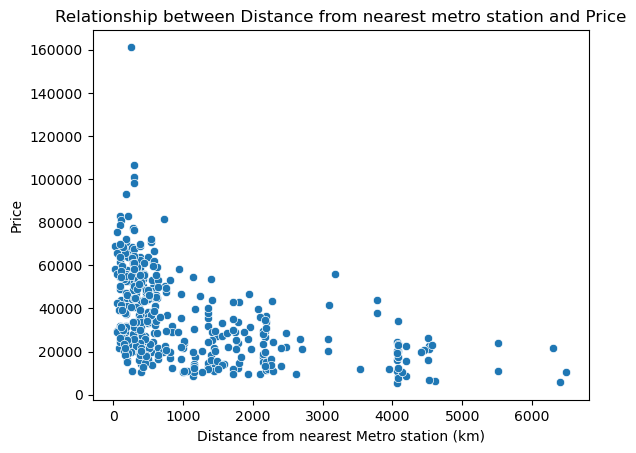

In [36]:
sns.scatterplot(data=data, x="Distance from nearest Metro station (km)", y="Price")
plt.title("Relationship between Distance from nearest metro station and Price")
plt.show()

#### There is negative correlation between "Distance from nearest metro station" and "Price"

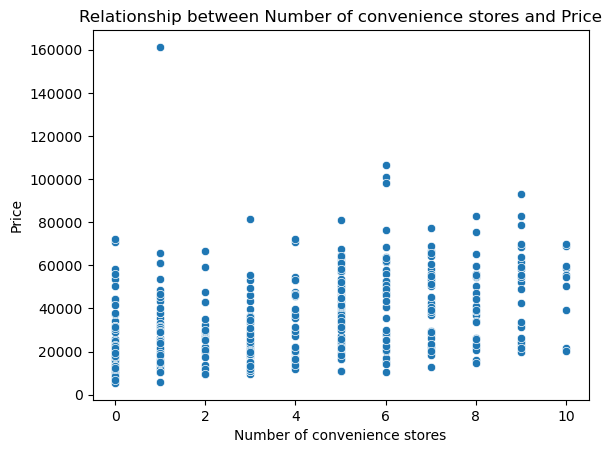

In [38]:
sns.scatterplot(data=data, x="Number of convenience stores", y="Price")
plt.title("Relationship between Number of convenience stores and Price")
plt.show()

#### I feel there is no correlation between "Number of convenience stores" and "Price"

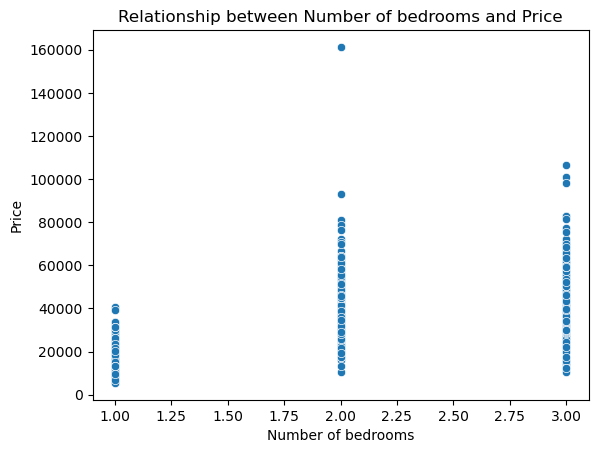

In [40]:
sns.scatterplot(data=data, x="Number of bedrooms", y="Price")
plt.title("Relationship between Number of bedrooms and Price")
plt.show()

#### There is positive correlation between number of bedrooms and price. the points increases with increase in price

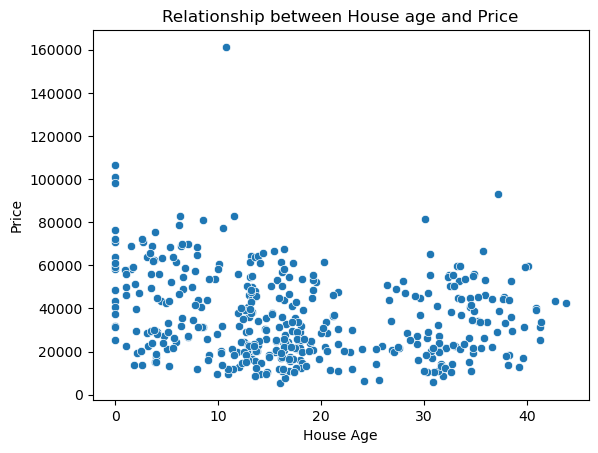

In [43]:
sns.scatterplot(data=data, x="House Age", y="Price")
plt.title("Relationship between House age and Price")
plt.show()

#### There is negative correlation between House age  and Price. seems like the older the house, the lower the price. 

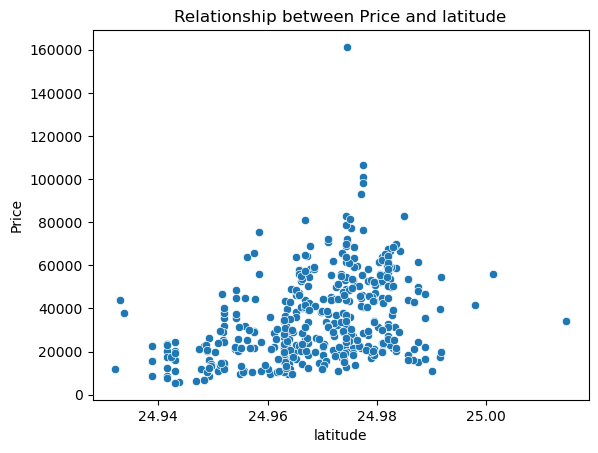

In [46]:
sns.scatterplot(data=data, x="latitude", y="Price")
plt.title("Relationship between Price and latitude")
plt.show()

#### There is positive correlation between latitude and price. I observed that there is increase in price with increase in latitude

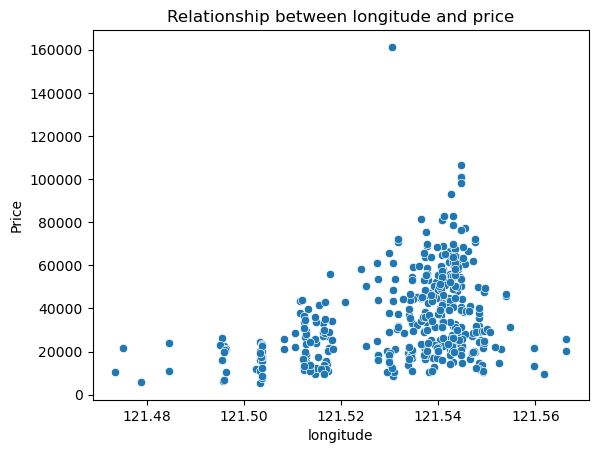

In [48]:
sns.scatterplot(data=data, x="longitude", y="Price")
plt.title("Relationship between longitude and price")
plt.show()

#### The figure above shows that price increases with increase in longitude

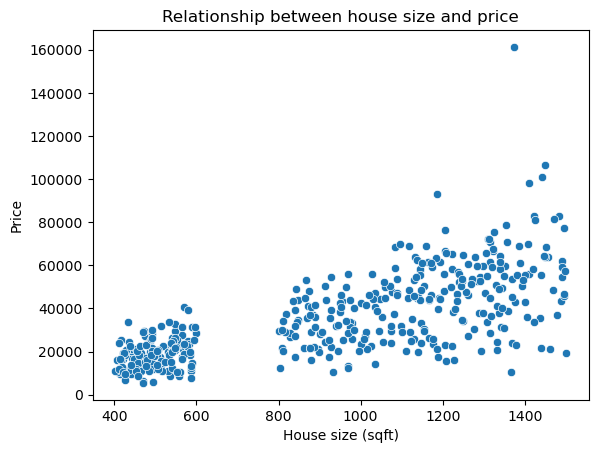

In [51]:
sns.scatterplot(data=data, x="House size (sqft)", y="Price")
plt.title("Relationship between house size and price")
plt.show()

#### There is positive correlation between house size and price. It shows that the bigger the house, the higher the price of the house

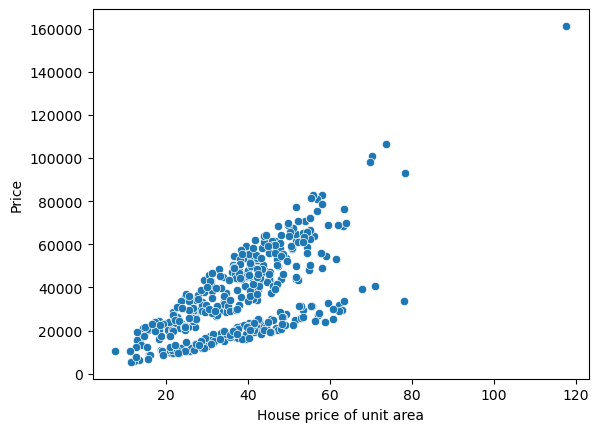

In [53]:
sns.scatterplot(data=data, x="House price of unit area", y="Price")
plt.show()

#### This graph above shows that the house price of unit area is highly correlated with price

In [54]:
# Checking for correlation
data.corr(method="pearson")

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529,0.119059
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.381169
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.378440
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,0.346538
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.548679
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.702782
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,0.698585
Price,0.119059,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,0.698585,1.000000


In [58]:
# dropping "Transaction date" column because it won't be needed
data=data.drop(["Transaction date"], axis=1)

In [59]:
data

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,12366.2
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,63900.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,20421.8
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,31342.5


In [65]:
# Calculating Variable Inflation Feature to expose multicollinearity. VIF between 1-5 is safe but anything higher is a threat
def calc_vif(x):
    
    #calculating VIF 
    vif =pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return(vif)

In [67]:
x=data.iloc[:,:-1]
calc_vif(x)

                                  variables        VIF
0                                 House Age       3.90
1  Distance from nearest Metro station (km)       3.77
2              Number of convenience stores       5.17
3                                  latitude 6324254.90
4                                 longitude 6317541.04
5                        Number of bedrooms      16.07
6                         House size (sqft)      19.04
7                  House price of unit area      20.53


,variables,VIF
0,House Age,3.90
1,Distance from nearest Metro station (km),3.77
2,Number of convenience stores,5.17
3,latitude,6324254.90
4,longitude,6317541.04
5,Number of bedrooms,16.07
6,House size (sqft),19.04
7,House price of unit area,20.53


#### There are traces of multicollinearity between some of the independent variables such as longitude and latitude, House price of unit area,  House size and Number of bedrooms. This is actually a threat to the prediction as the estimated regression coefficient may become large and unpredictable, leading to unreliable inferences about the effects of the predictor variables on the response variable. This problem leads us to not being able to see the individual effect of each variable since increase in one leads to increase in another.

#### From our output above, we already know the columns with high VIF each. This will result to dropping one of each groups. Since that will lead to decrease in feature which may be or may not be adding information to the model..

In [68]:
# creating another dataframe while dropping the columns with high VIF. i will be keeping the old dataframe.
new_data=data.drop(["latitude","Number of bedrooms","House price of unit area"],axis=1)

In [69]:
new_data

,House Age,Distance from nearest Metro station (km),Number of convenience stores,longitude,House size (sqft),Price
0,32.00,84.88,10,121.54,575,21792.50
1,19.50,306.59,9,121.54,1240,52328.00
2,13.30,561.98,5,121.54,1060,50138.00
3,13.30,561.98,5,121.54,875,47950.00
4,5.00,390.57,5,121.54,491,21162.10
...,...,...,...,...,...,...
409,13.70,4082.01,0,121.50,803,12366.20
410,5.60,90.46,9,121.54,1278,63900.00
411,18.80,390.97,7,121.54,503,20421.80
412,8.10,104.81,5,121.54,597,31342.50


In [79]:
#creating my X_correlated and y_correlated variables with DataFrame that has all correlated columns
X_corr=data.iloc[:,:-1]
y_corr=data['Price']

In [70]:
x=new_data.iloc[:,:-1]
y=new_data["Price"]

In [71]:
x

,House Age,Distance from nearest Metro station (km),Number of convenience stores,longitude,House size (sqft)
0,32.00,84.88,10,121.54,575
1,19.50,306.59,9,121.54,1240
2,13.30,561.98,5,121.54,1060
3,13.30,561.98,5,121.54,875
4,5.00,390.57,5,121.54,491
...,...,...,...,...,...
409,13.70,4082.01,0,121.50,803
410,5.60,90.46,9,121.54,1278
411,18.80,390.97,7,121.54,503
412,8.10,104.81,5,121.54,597


In [72]:
y

0     21792.50
1     52328.00
2     50138.00
3     47950.00
4     21162.10
        ...   
409   12366.20
410   63900.00
411   20421.80
412   31342.50
413   70098.30
Name: Price, Length: 414, dtype: float64

In [80]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split( X_corr, y_corr, train_size = 0.7, test_size = 0.3, random_state =100)

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [82]:
# Feature scaling
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_trainc_scaled = sc.fit_transform(X_trainc)
X_testc_scaled = sc.fit_transform(X_testc)

In [83]:
def regression_model(model,correlated=True):
    """
    
    This function calculates a cross-validation of the model specified
    
    model: A regression model
    
    correlated: boolean
    
    if True:
    The variables used are from the dataframe in which VIF has been taken into consideration to curb multicollinearity
    if False:
    The variables used are from the normal dataframe
    
    returns:
    --------
    A list
    The list consist of RMSE(root mean square error) value of training set, RMSE value of test set and The R2 score of the model.
    
    """
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    if correlated:
        regression = model.fit(X_trainc_scaled,y_trainc)
        score_train = -1 * cross_val_score(regression, X_trainc_scaled, y_trainc, cv=cv, scoring='neg_root_mean_squared_error').mean()
        score_test = mean_squared_error(y_testc, regression.predict(X_testc_scaled), squared=False)
        r2score = r2_score(y_testc, regression.predict(X_testc_scaled))
        return [score_train,score_test,r2score]
    else:
        regression = model.fit(X_train_scaled, y_train)
        score_train = -1 * cross_val_score(regression, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
        score_test = mean_squared_error(y_test, regression.predict(X_test_scaled), squared=False)
        r2score = r2_score(y_test, regression.predict(X_test_scaled))
        return [score_train,score_test,r2score]

In [84]:
# Models with DataFrame that are correlated
LR = regression_model(LinearRegression())
LCV = regression_model(LassoCV())
RCV = regression_model(RidgeCV())
RF = regression_model(RandomForestRegressor())

# Models with DataFrame with reduced multicollinearity 
LR_ = regression_model(LinearRegression(),correlated=False)
LCV_ = regression_model(LassoCV(),correlated=False)
RCV_= regression_model(RidgeCV(),correlated=False)
RF_ = regression_model(RandomForestRegressor(),correlated=False)

In [85]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_trainc_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7
0,0.05,0.09,0.94,-0.07,0.04,0.31,0.05,0.04
1,0.51,-0.05,-0.04,0.29,-0.14,0.01,0.02,0.80
2,-0.41,0.04,0.19,0.15,-0.77,-0.41,-0.02,0.09
3,-0.40,0.01,0.14,0.63,0.55,-0.32,0.02,0.14
4,-0.45,0.04,-0.03,-0.65,0.22,-0.09,0.03,0.56


In [86]:
pca.explained_variance_ratio_


array([0.40842028, 0.21973793, 0.13311552, 0.07759474, 0.0698711 ,
       0.04441368, 0.02987084, 0.0169759 ])

In [87]:
#observing columns with the most variance according to PCA
model = PCA(n_components=5)
X_pc = model.fit_transform(X_trainc)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_trainc.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_ = pd.DataFrame(dic.items())
df_


,0,1
0,PC0,Distance from nearest Metro station (km)
1,PC1,House size (sqft)
2,PC2,House Age
3,PC3,House price of unit area
4,PC4,Number of convenience stores


#### The dataframe above shows that 'Distance from the nearest Metro station (km)' has the most variance according to PCA follow by 'House size' and so on.

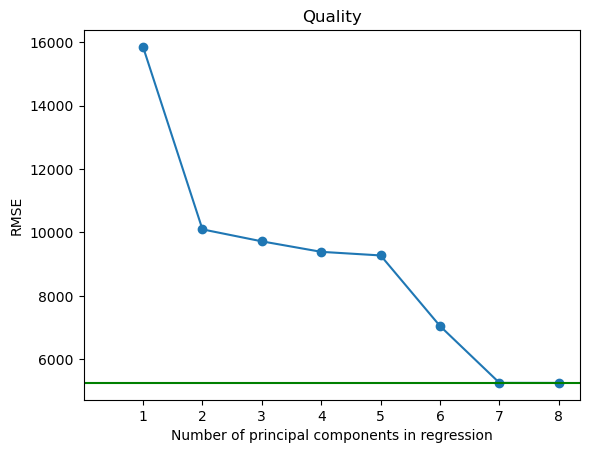

In [88]:
#Visualizing the Principal components to pick the most suitable number of component
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_trainc, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=LR[0], color='g', linestyle='-')

#### It shows, having 7 features is similar to having 8 as the RMSE remains constant for the model. Now I will perform PCA for the exact number of component.

In [89]:
best_pc_num = 7

# Train model with first 7 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_trainc)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_trainc, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_trainc)

# Get first 7 principal components of test set
X_test_pc = pca.transform(X_testc_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_testc, preds, squared=False)
pcr_r2score = r2_score(y_testc, lin_reg_pc.predict(X_test_pc))

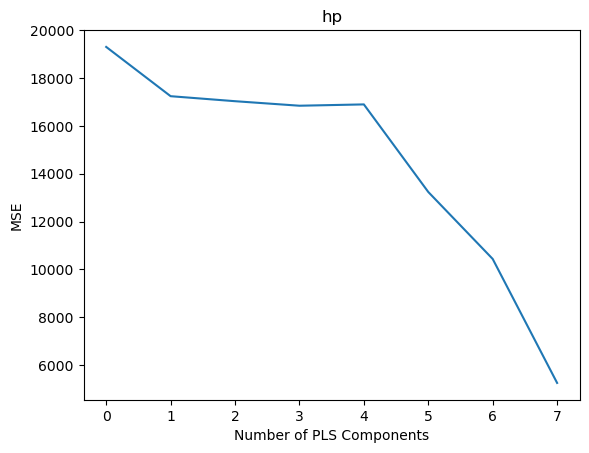

In [91]:
#Partial least squares
rmse_list=[]
for i in range(1, X_trainc_scaled.shape[1]+1):
    pls = PLSRegression(n_components=i)
    rmse_score = -1 * cross_val_score(pls, 
                                      X_trainc_scaled[:,:i],
                                      y_trainc, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

#plot test MSE vs. number of components
plt.plot(rmse_list)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')
plt.show()

#### The above shows that the RMSE kept decreasing with an increase in the components. Using all 7 components wouldn't be such a bad idea afterall and judging by this, there is possibility that more features can improve the model but I'll save the conclusion till the evaluation stage.

In [92]:
#USing all 7 components for PLS method
PLS=regression_model(PLSRegression(n_components=7))

#### Now with all models done, I will create a dataframe with every of the results.

In [94]:
final_data = pd.DataFrame()

final_data["Models"] = ['Linear Regression(correlated)','Linear Regression (VIF)','Lasso Regression (correlated)',
                      'Lasso Regression (VIF)','Ridge Regression (correlated)', 'Ridge Regression (VIF)',
                      'Random Forest Regression (VIF)', 'Random Forest Regression (correlated)','Principal Component Regression(7 components)','Partial Least Squares']
final_data["RMSE(Train Set)"] = [LR[0],LR_[0],LCV[0],LCV_[0],RCV[0],
                               RCV_[0],RF_[0],RF[0],pcr_score_train,PLS[0]]
final_data["RMSE(Test Set)"] = [LR[1],LR_[1],LCV[1],LCV_[1],RCV[1],
                               RCV_[1],RF_[1],RF[1],pcr_score_test,PLS[1]]
final_data["R2 Score"] = [LR[2],LR_[2],LCV[2],LCV_[2],RCV[2],
                               RCV_[2],RF_[2],RF[2],pcr_r2score,PLS[2]]

In [95]:
final_data

,Models,RMSE(Train Set),RMSE(Test Set),R2 Score
0,Linear Regression(correlated),5250.20,4989.36,0.93
1,Linear Regression (VIF),5250.20,4989.36,0.93
2,Lasso Regression (correlated),5150.57,4898.22,0.93
3,Lasso Regression (VIF),5150.57,4898.22,0.93
4,Ridge Regression (correlated),5265.52,4986.31,0.93
5,Ridge Regression (VIF),5265.52,4986.31,0.93
6,Random Forest Regression (VIF),3772.78,3260.02,0.97
7,Random Forest Regression (correlated),3744.90,3100.50,0.97
8,Principal Component Regression(7 components),5251.83,5016.48,0.93
9,Partial Least Squares,5249.29,4990.62,0.93


## SUMMARY



Models with correlated features gave better results than the ones with removed high VIF. PCA gave a fair result which is not as good as using all the features but still better than VIF. PLS did better than PCA. The random forest model did way better than other modeLs with the lowest RMSE and highest R2 score.